#Capa silver

## Carga de los datos desde Bronce. 

In [0]:
from pyspark.sql import SparkSession

# Crear sesión de Spark
spark = SparkSession.builder.appName("Nanotecnologia").getOrCreate()

# Define la ruta para la capa Silver
silver_path = "/mnt/delta/silver"

print("Sesión de Spark creada y ruta para la capa Silver definida.")

Sesión de Spark creada y ruta para la capa Silver definida.


In [0]:
# Cargar el DataFrame de la capa Silver
df_silver = spark.read.format("delta").load(silver_path)

print("DataFrame de la capa Silver cargado.")

DataFrame de la capa Silver cargado.


## Visualización de los datos. 

In [0]:
# Visualización del DataFrame
df_silver.show()
df_silver.describe().show()


+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+
|id_material|              nombre|   compuesto_quimico|          aplicacion|fecha_creacion|id_experimento|id_propiedad|temperatura_prueba| presion_aplicada|duracion_experimento|       resistencia|       elasticidad|conductividad_termica|          densidad|diametro_nanoparticulas|      espesor_capa|capacidad_absorcion_luz|
+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+
|          1|Nanopartículas 

##Modificaciones extras 

In [0]:
from pyspark.sql.functions import avg 

# Calcular promedios de propiedades por material
df_promedios = df_silver.groupBy("nombre").agg(
    avg("resistencia").alias("promedio_resistencia"),
    avg("elasticidad").alias("promedio_elasticidad"),
    avg("conductividad_termica").alias("promedio_conductividad_termica")
)

# Ruta para guardar los promedios
promedios_path = f"{silver_path}/promedios"

# Leer datos existentes, si los hay
try:
    existing_df = spark.read.format("delta").load(promedios_path)
    print("La ruta ya tiene un registro de transacciones Delta.")
    
    # Unir los nuevos promedios con los existentes
    updated_df = existing_df.unionByName(df_promedios, allowMissingColumns=True)

    # Guardar el DataFrame actualizado con overwriteSchema
    updated_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
    print("Promedios actualizados y guardados en la capa Silver.")
except Exception as e:
    print(f"La ruta no tiene un registro de transacciones Delta o ocurrió un error: {e}")

    # Si no existen datos, guardar df_promedios directamente
    try:
        df_promedios.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
        print("Promedios calculados y guardados en la capa Silver.")
    except Exception as e:
        print(f"Ocurrió un error al guardar los promedios: {e}")

# Crear tabla para los promedios
spark.sql(f"""
    CREATE TABLE IF NOT EXISTS silver_promedios
    USING DELTA
    LOCATION '{promedios_path}'
""")


La ruta ya tiene un registro de transacciones Delta.
Promedios actualizados y guardados en la capa Silver.
Out[4]: DataFrame[]

In [0]:
# Calcular promedios de propiedades por material
df_promedios = df_silver.groupBy("nombre").agg(
    avg("resistencia").alias("promedio_resistencia"),
    avg("elasticidad").alias("promedio_elasticidad"),
    avg("conductividad_termica").alias("promedio_conductividad_termica")
)

# Ruta para guardar los promedios
promedios_path = f"{silver_path}/promedios"

# Leer datos existentes, si los hay
try:
    existing_df = spark.read.format("delta").load(promedios_path)
    print("La ruta ya tiene un registro de transacciones Delta.")
    
    # Unir los nuevos promedios con los existentes
    updated_df = existing_df.unionByName(df_promedios, allowMissingColumns=True)

    # Guardar el DataFrame actualizado con overwriteSchema
    updated_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
    print("Promedios actualizados y guardados en la capa Silver.")
except Exception as e:
    print(f"La ruta no tiene un registro de transacciones Delta o ocurrió un error: {e}")

    # Si no existen datos, guardar df_promedios directamente
    try:
        df_promedios.write.format("delta").mode("overwrite").option("overwriteSchema", "true").save(promedios_path)
        print("Promedios calculados y guardados en la capa Silver.")
    except Exception as e:
        print(f"Ocurrió un error al guardar los promedios: {e}")

# Crear tabla para los promedios
spark.sql(f"""
    CREATE TABLE IF NOT EXISTS silver_promedios
    USING DELTA
    LOCATION '{promedios_path}'
""")


La ruta ya tiene un registro de transacciones Delta.
Promedios actualizados y guardados en la capa Silver.
Out[5]: DataFrame[]

DataFrame df_silver:
   id_material                                nombre  \
0            1    Nanopartículas de óxido de samario   
1            2  Nanopartículas de óxido de disprosio   
2            3   Nanopartículas de óxido de prometio   
3            4                            Fullerenos   
4            5            Nanomateriales cristalinos   

                              compuesto_quimico                    aplicacion  \
0   Nanopartículas de dióxido de titanio (TiO₂)      Revestimientos cerámicos   
1                  Nanopartículas de plata (Ag)                        Imanes   
2                                 MXenes (null)    Materiales de construcción   
3    Nanopartículas de óxido de tungsteno (WO₃)                        Imanes   
4  Nanopartículas de óxido de disprosio (Dy₂O₃)  Pantallas de alta resolución   

  fecha_creacion  id_experimento  id_propiedad  temperatura_prueba  \
0     2024-04-26               1             1           11.518932   
1     2024-02-0

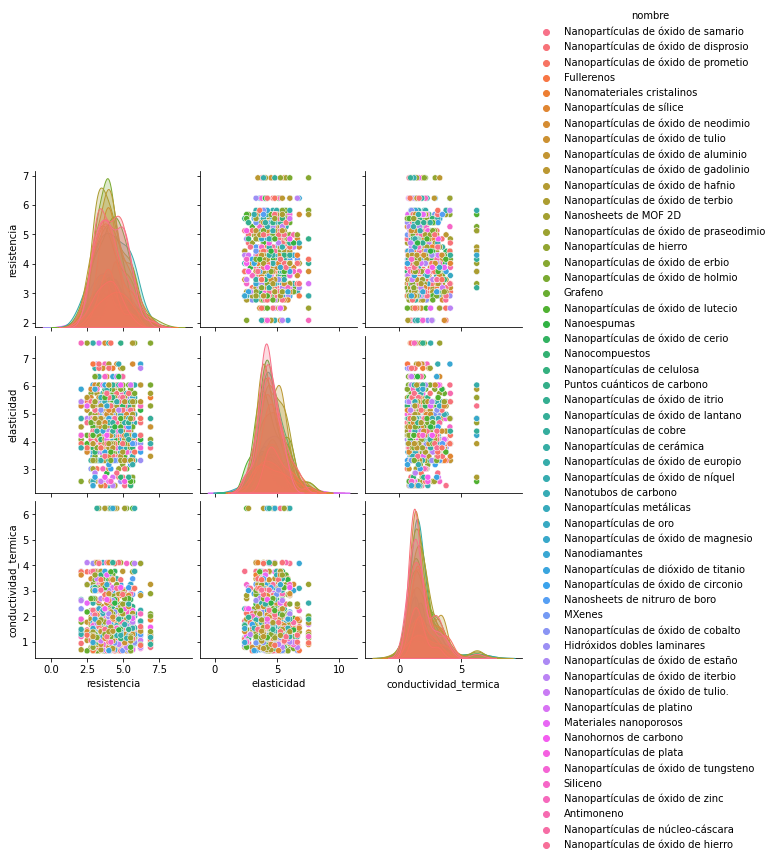

Datos comprimidos y guardados en formato Parquet en: /ruta/a/datos_comprimidos


In [0]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

# Convertir el DataFrame de Spark a Pandas para análisis exploratorio
df_silver_pd = df_silver.toPandas()

# Mostrar las primeras filas del DataFrame
print("DataFrame df_silver:")
print(df_silver_pd.head())

# Mostrar resumen estadístico del DataFrame
print("\nResumen estadístico de df_silver:")
print(df_silver_pd.describe())

# Verificar los nombres de las columnas
print("\nNombres de las columnas del DataFrame:")
print(df_silver_pd.columns)

# Crear gráficos de dispersión para identificar relaciones entre variables
sns.pairplot(df_silver_pd, vars=["resistencia", "elasticidad", "conductividad_termica"], hue="nombre")
plt.show()

# Creación de un VectorAssembler combinando las columnas seleccionadas en un solo vector de características
assembler = VectorAssembler(
    inputCols=["resistencia", "elasticidad", "conductividad_termica"], 
    outputCol="features"
)

# Transformación del DataFrame
df_features = assembler.transform(df_silver)

# Configuración del modelo K-Means
kmeans = KMeans(k=3, seed=1)  # k: número de clusters, seed: semilla para reproducibilidad
model = kmeans.fit(df_features)

# Aplicación del modelo para identificar clusters
df_anomalies = model.transform(df_features)

# Configuración de la compresión Parquet
output_path = "/ruta/a/datos_comprimidos"  # Especifica la ruta donde deseas guardar los datos
compression_format = "snappy"             # Formato de compresión (puede ser snappy, gzip, etc.)

# Guardar los datos transformados en formato Parquet con compresión
df_anomalies.write \
    .mode("overwrite") \
    .format("parquet") \
    .option("compression", compression_format) \
    .save(output_path)

print(f"Datos comprimidos y guardados en formato Parquet en: {output_path}")

In [0]:
#Nos aseguramos que nuestros datos esten correctos mediante SQL.
df = spark.read.parquet("/ruta/a/datos_comprimidos")
df.createOrReplaceTempView("mi_tabla_parquet")

In [0]:
%sql
SELECT * FROM mi_tabla_parquet

id_material,nombre,compuesto_quimico,aplicacion,fecha_creacion,id_experimento,id_propiedad,temperatura_prueba,presion_aplicada,duracion_experimento,resistencia,elasticidad,conductividad_termica,densidad,diametro_nanoparticulas,espesor_capa,capacidad_absorcion_luz,features,prediction
1,Nanopartículas de óxido de samario,Nanopartículas de dióxido de titanio (TiO₂),Revestimientos cerámicos,2024-04-26,1,1,11.518931599429449,5.641146757237324,3.752820797450482,5.121737075643065,2.4145480829903834,1.8074487225380391,2.598593880128943,2.5799905949886974,2.011817808509382,7.679647279022113,"Map(vectorType -> dense, length -> 3, values -> List(5.121737075643065, 2.4145480829903834, 1.8074487225380391))",2
2,Nanopartículas de óxido de disprosio,Nanopartículas de plata (Ag),Imanes,2024-02-02,2,2,9.486178964236016,4.773278025354659,3.5182694976098268,4.568035770168138,3.4709128692986764,1.7700532317269073,1.9904123337157862,2.364991378739639,1.9399671724911896,5.63174133794955,"Map(vectorType -> dense, length -> 3, values -> List(4.568035770168138, 3.4709128692986764, 1.7700532317269073))",2
3,Nanopartículas de óxido de prometio,MXenes (null),Materiales de construcción,2024-07-05,3,3,10.502555281832732,6.075081123178657,3.2837181977691716,5.67543838111799,4.829096165980767,2.000658758395554,1.3822307873026294,1.3616617029107014,1.9399671724911896,6.911682551119902,"Map(vectorType -> dense, length -> 3, values -> List(5.67543838111799, 4.829096165980767, 2.000658758395554))",2
4,Fullerenos,Nanopartículas de óxido de tungsteno (WO₃),Imanes,2024-06-22,4,4,10.841347387698304,6.942949855061322,2.8146155980878613,3.8759091383244813,6.036370207475959,0.891259197665309,3.4832215840026257,1.3616617029107014,0.8622076322183065,5.3757530953154795,"Map(vectorType -> dense, length -> 3, values -> List(3.8759091383244813, 6.036370207475959, 0.891259197665309))",0
5,Nanomateriales cristalinos,Nanopartículas de óxido de disprosio (Dy₂O₃),Pantallas de alta resolución,2023-11-22,5,5,10.841347387698304,5.207212391295991,4.691025996813102,4.429610443799407,3.3200036141117772,1.377400578210023,1.3269415558105242,2.436657784155992,1.2933114483274597,8.020964935867541,"Map(vectorType -> dense, length -> 3, values -> List(4.429610443799407, 3.3200036141117772, 1.377400578210023))",2
6,Nanopartículas de sílice,Nanopartículas de óxido de estaño (SnO₂),Conductores eléctricos,2024-09-17,6,6,11.85772370529502,7.376884221002654,2.110961698565896,2.906931853743361,5.432733186728362,1.763820649925052,3.151486195049995,2.0066593516578757,1.5807139924002285,6.2290472374290475,"Map(vectorType -> dense, length -> 3, values -> List(2.906931853743361, 5.432733186728362, 1.763820649925052))",0
7,Nanopartículas de óxido de prometio,Nanodiamantes ©,Imanes,2024-08-06,7,7,10.16376317596716,6.942949855061322,2.8146155980878613,2.4916558746371664,5.432733186728362,3.7395490811131844,2.488015417144733,3.153321838319519,2.371070988600343,6.997011965331259,"Map(vectorType -> dense, length -> 3, values -> List(2.4916558746371664, 5.432733186728362, 3.7395490811131844))",1
8,Nanopartículas de óxido de neodimio,Hidróxidos dobles laminares (null),Protección solar,2024-09-17,8,8,11.518931599429449,6.075081123178657,4.925577296653757,4.1527597910619445,4.5272776556069685,1.3898657418137337,2.875040037589469,1.0749960812452906,2.2992203525821506,7.850306107444827,"Map(vectorType -> dense, length -> 3, values -> List(4.1527597910619445, 4.5272776556069685, 1.3898657418137337))",0
9,Nanopartículas de óxido de tulio,Nanopartículas de platino (Pt),Imanes,2023-12-16,9,9,9.824971070101588,6.075081123178657,3.5182694976098268,4.1527597910619445,4.829096165980767,2.6862427565996376,2.6538831116210484,1.0749960812452906,1.5807139924002285,6.485035480063118,"Map(vectorType -> dense, length -> 3, values -> List(4.1527597910619445, 4.829096165980767, 2.6862427565996376))",1
10,Nanopartículas de óxido de disprosio,Nanopartículas de óxido de samario (Sm₂O₃),Diagnóstico médico,2023-10-20,10,10,11.8577237052

##Gobernanza de datos y seguridad

In [0]:
from pyspark.sql import SparkSession

# Crear la sesión de Spark configurada para Azure Data Lake Storage
spark = SparkSession.builder \
    .appName("AzureDataLakeConnection") \
    .config("spark.hadoop.fs.azure.account.auth.type.almacenexperimentos.dfs.core.windows.net", "OAuth") \
    .config("spark.hadoop.fs.azure.account.oauth.provider.type.almacenexperimentos.dfs.core.windows.net", 
            "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider") \
    .config("spark.hadoop.fs.azure.account.oauth2.client.id.almacenexperimentos.dfs.core.windows.net", "a03b361a-92dd-4b40-96b5-f9cd6d7759ed") \
    .config("spark.hadoop.fs.azure.account.oauth2.client.secret.almacenexperimentos.dfs.core.windows.net", "d825ea70-00d7-49c8-9620-bc9f1f5f4921") \
    .config("spark.hadoop.fs.azure.account.oauth2.client.endpoint.almacenexperimentos.dfs.core.windows.net", 
            "https://login.microsoftonline.com/244d9ce0-f571-4d91-a05d-c7b0d8cce0bd/oauth2/token") \
    .getOrCreate()

# Verificar que la sesión de Spark se haya creado correctamente
print(f"Spark Session version: {spark.version}")


Spark Session version: 3.3.2


In [0]:
input_path = "/ruta/a/datos_comprimidos"  # Ruta del archivo Parquet en tu entorno local
df = spark.read.parquet(input_path)
df.show()  # Muestra algunas filas para verificar que se ha leído correctamente

+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+--------------------+----------+
|id_material|              nombre|   compuesto_quimico|          aplicacion|fecha_creacion|id_experimento|id_propiedad|temperatura_prueba| presion_aplicada|duracion_experimento|       resistencia|       elasticidad|conductividad_termica|          densidad|diametro_nanoparticulas|      espesor_capa|capacidad_absorcion_luz|            features|prediction|
+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+--------

In [0]:
# Definir la ruta de salida para la capa Gold
output_path = "/FileStore/tables/gold"

# Escribir los datos en la capa Gold
df.write.mode('overwrite').parquet(output_path)

# Leer los datos de la capa Gold para verificar
df_gold = spark.read.parquet(output_path)
df_gold.show()

+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+------------------+-----------------------+--------------------+----------+
|id_material|              nombre|   compuesto_quimico|          aplicacion|fecha_creacion|id_experimento|id_propiedad|temperatura_prueba| presion_aplicada|duracion_experimento|       resistencia|       elasticidad|conductividad_termica|          densidad|diametro_nanoparticulas|      espesor_capa|capacidad_absorcion_luz|            features|prediction|
+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+------------------+-----------------+--------------------+------------------+------------------+---------------------+------------------+-----------------------+--------